In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]



small_index = np.array(np.where(meta[:,1]<1000)[0])
small_meta = meta[small_index,:]
large_index = np.array(np.where(meta[:,1]>5000)[0])
large_meta = meta[large_index,:]

balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
bal_meta = meta[balance_index,:]
inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])
inb_meta = meta[inbalance_index,:]

In [3]:
[len(bin_index),len(multi_index),len(small_index),len(large_index),len(inbalance_index),len(balance_index)]

[91, 75, 95, 26, 24, 137]

In [3]:
bv3 = np.load("lgbbv3.npy")
bv4 = np.load("lgbbv4.npy")
bv5 = np.load("lgbbv5.npy")
bv6 = np.load("lgbbv6.npy")
bv7 = np.load("lgbbv7.npy")

In [5]:
bv6.shape
# 4d (array +array + array+ array)
### pc 1 st suppose 9 but currently 2
### pc 2nd 166 datasets
### pc 3rd options for each par
### pc 4th 6 stats



(9, 166, 3, 6)

In [10]:
c1 = np.repeat(0.6,9)
c2 = np.repeat([0.1,0.15,0.2],3)
c3 = np.tile([0.1,0.15,0.2],3)
size_set = np.column_stack((c1,c2,c3))
numsize = size_set.shape[0]
size_set

array([[0.6 , 0.1 , 0.1 ],
       [0.6 , 0.1 , 0.15],
       [0.6 , 0.1 , 0.2 ],
       [0.6 , 0.15, 0.1 ],
       [0.6 , 0.15, 0.15],
       [0.6 , 0.15, 0.2 ],
       [0.6 , 0.2 , 0.1 ],
       [0.6 , 0.2 , 0.15],
       [0.6 , 0.2 , 0.2 ]])

In [11]:
standard = bv6[4]

In [12]:
standard.shape

(166, 3, 6)

In [13]:
standard_o = []
standard_d = []
standard_r = []

In [14]:
for i in range(0,166):
    standard_o.append(standard[i][0])
    standard_d.append(standard[i][1])
    standard_r.append(standard[i][2])
np_standard_o = np.array(standard_o)
np_standard_d = np.array(standard_d)
np_standard_r = np.array(standard_r)

In [15]:
pd_standard_o = pd.DataFrame(np_standard_o,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_d = pd.DataFrame(np_standard_d,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_r = pd.DataFrame(np_standard_r,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_o.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.257422,0.187576,0.169229,0.032542,0.294429,0.041157
std,0.215187,0.154163,0.183345,0.032548,0.200771,0.045245
min,0.000000,0.000000,0.000000,0.000000,0.012937,0.000000
25%,0.066833,0.055918,0.004489,0.002766,0.112721,0.009194
50%,0.217391,0.154797,0.110556,0.019996,0.269697,0.030819
75%,0.392665,0.285865,0.273721,0.055527,0.456128,0.055623
max,1.000000,0.710000,0.680000,0.175136,0.823636,0.300000


In [12]:
pd_standard_d.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.257423,0.187519,0.169175,0.032546,0.294378,0.041170
std,0.215185,0.154161,0.183326,0.032504,0.200793,0.045233
min,0.000000,0.000000,0.000000,0.000000,0.012937,0.000000
25%,0.066833,0.055810,0.004489,0.002754,0.112721,0.009194
50%,0.217391,0.154797,0.110556,0.019996,0.269697,0.030819
75%,0.392665,0.285865,0.273721,0.055527,0.456128,0.055623
max,1.000000,0.710000,0.680000,0.173607,0.823636,0.300000


In [13]:
pd_standard_r.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.259387,0.189273,0.172637,0.033544,0.298003,0.041495
std,0.213472,0.155668,0.184551,0.033213,0.201029,0.045942
min,0.000000,0.000000,0.000000,0.000000,0.014077,0.000000
25%,0.067583,0.056333,0.004929,0.003213,0.115197,0.009281
50%,0.220000,0.160119,0.114589,0.022083,0.280655,0.031334
75%,0.394073,0.289312,0.298349,0.057407,0.462989,0.055123
max,1.000000,0.710000,0.680000,0.189958,0.823636,0.300000


(array([50., 27., 29., 19., 17.,  9.,  8.,  4.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

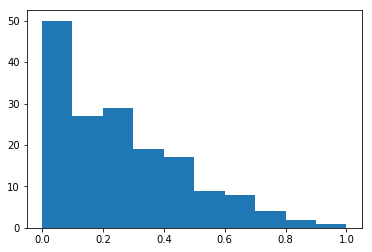

In [14]:
plt.hist(pd_standard_o["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

(array([50., 27., 29., 19., 17.,  9.,  8.,  4.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

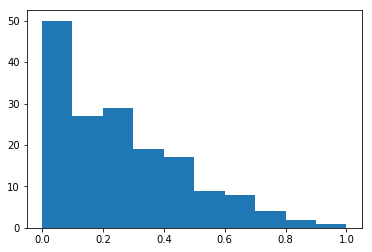

In [15]:
plt.hist(pd_standard_d["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

(array([48., 27., 29., 21., 16., 12.,  6.,  4.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

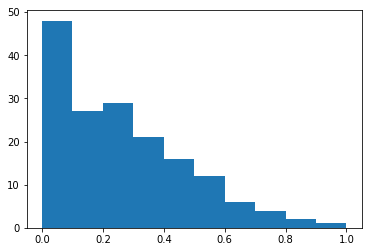

In [16]:
plt.hist(pd_standard_r["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Standard set

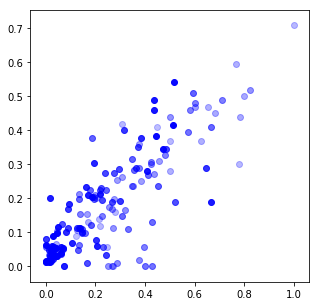

In [33]:
bias = np_standard_o[:,0]
var = np_standard_o[:,1]
train_err = np_standard_o[:,2]
train_std = np_standard_o[:,3]
test_err = np_standard_o[:,4]
test_std = np_standard_o[:,5]


##rankdata is larger if the stat is larger
alpha = 0.25+0.75*stats.rankdata(meta[:,2])/166
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
for i in range(0,166):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
# ax2 = plt.subplot(122)
# for i in range(0,166):
#     ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")

plt.savefig("pic2.1.1.jpg")
plt.show()

#plt.scatter(bias,var,alpha=0.6)


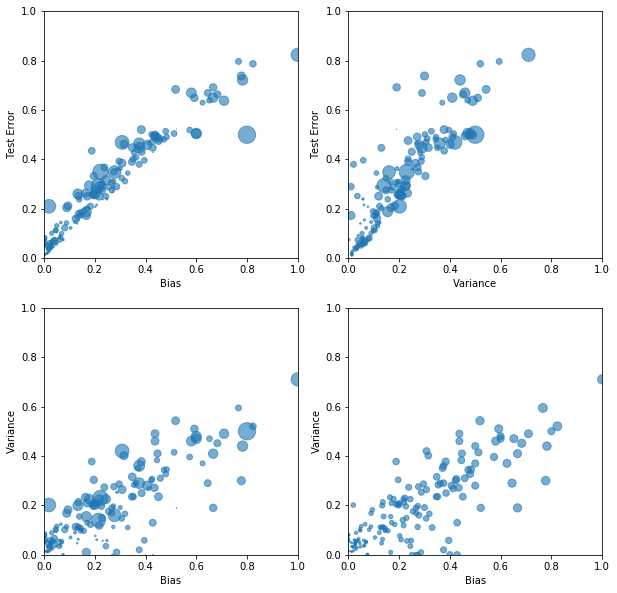

In [34]:
fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.1.2.jpg")
plt.show()

# Binary set

In [17]:
np_standard_o = np.array(standard_o)

In [18]:
np_bin_standard_o = np_standard_o[bin_index,:]
np_bin_standard_o.shape

(91, 6)

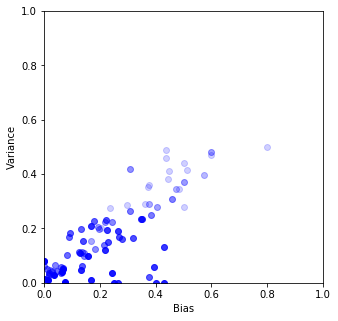

In [19]:
bias = np_bin_standard_o[:,0]
var = np_bin_standard_o[:,1]
train_err = np_bin_standard_o[:,2]
train_std = np_bin_standard_o[:,3]
test_err = np_bin_standard_o[:,4]
test_std = np_bin_standard_o[:,5]

alpha = 0.1 + 0.9*stats.rankdata(bin_meta[:,5])/91
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,91):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
plt.savefig("pic2.2.1.jpg")

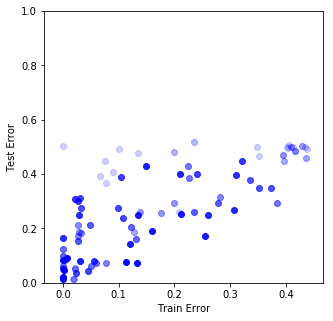

In [20]:
fig = plt.figure(figsize=(5,5))
ax2 = plt.subplot(111)
plt.xlabel("Train Error")
plt.ylabel("Test Error")
plt.ylim([0,1])
for i in range(0,91):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")

plt.savefig("pic2.2.2.jpg")
plt.show()

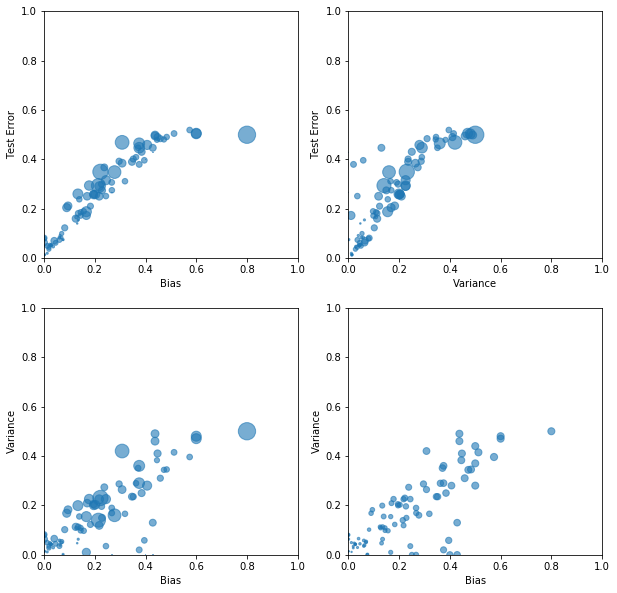

In [40]:


fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.5.jpg")
plt.show()

# Multi set

In [22]:
np_multi_standard_o = np_standard_o[multi_index,:]
np_multi_standard_o.shape

(75, 6)

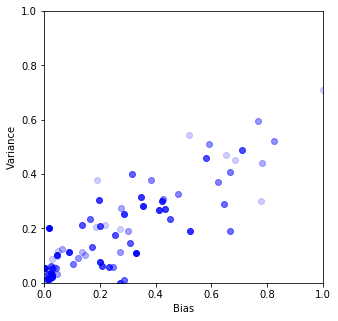

In [43]:
bias = np_multi_standard_o[:,0]
var = np_multi_standard_o[:,1]
train_err = np_multi_standard_o[:,2]
train_std = np_multi_standard_o[:,3]
test_err = np_multi_standard_o[:,4]
test_std = np_multi_standard_o[:,5]

alpha = 0.1 + 0.9*stats.rankdata(multi_meta[:,5])/75
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,75):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
plt.savefig("pic2.2.3.jpg")     

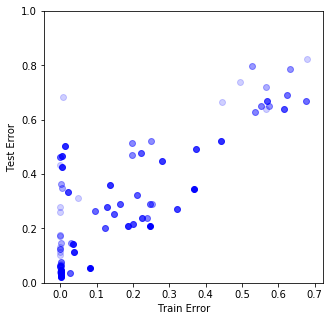

In [44]:
fig = plt.figure(figsize=(5,5))
ax2 = plt.subplot(111)
plt.xlabel("Train Error")
plt.ylabel("Test Error")
plt.ylim([0,1])
for i in range(0,75):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")
plt.savefig("pic2.2.4.jpg")        
plt.show()



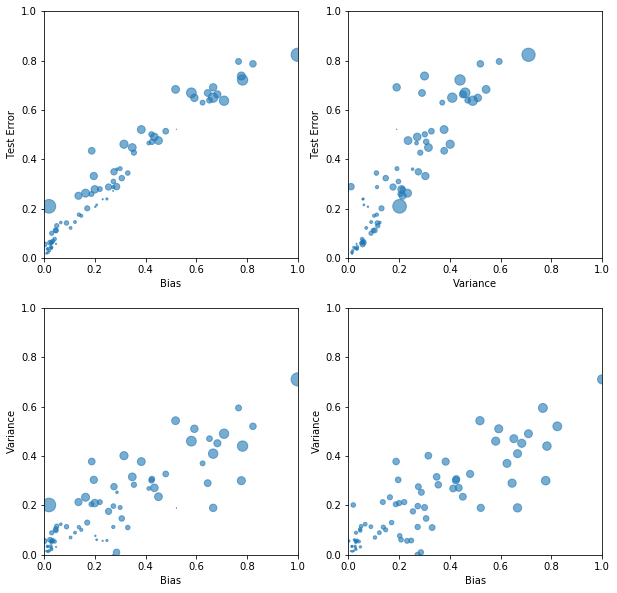

In [45]:

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.6.jpg")   
plt.show()

# Balance set

In [24]:
np_bal_standard_o = np_standard_o[balance_index,:]
np_bal_standard_o.shape

(137, 6)

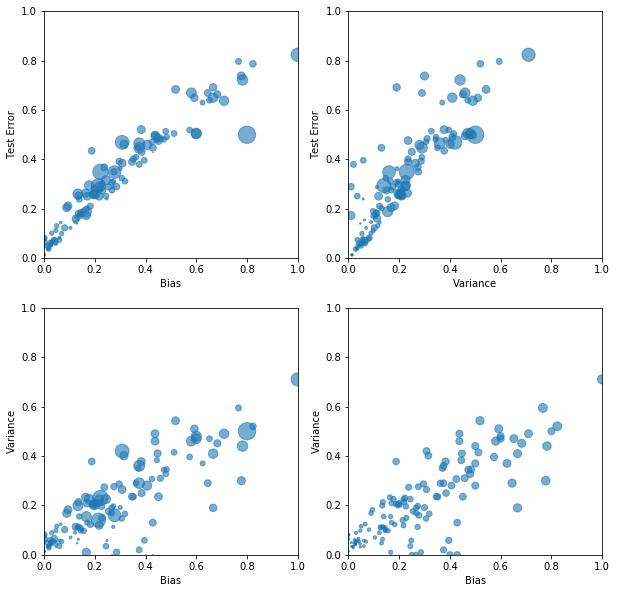

In [46]:
bias = np_bal_standard_o[:,0]
var = np_bal_standard_o[:,1]
train_err = np_bal_standard_o[:,2]
train_std = np_bal_standard_o[:,3]
test_err = np_bal_standard_o[:,4]
test_std = np_bal_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(bal_meta[:,4])/137
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,137):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.7.jpg")   
plt.show()

# Inbalance set

In [26]:
np_inb_standard_o = np_standard_o[inbalance_index,:]
np_inb_standard_o.shape

(24, 6)

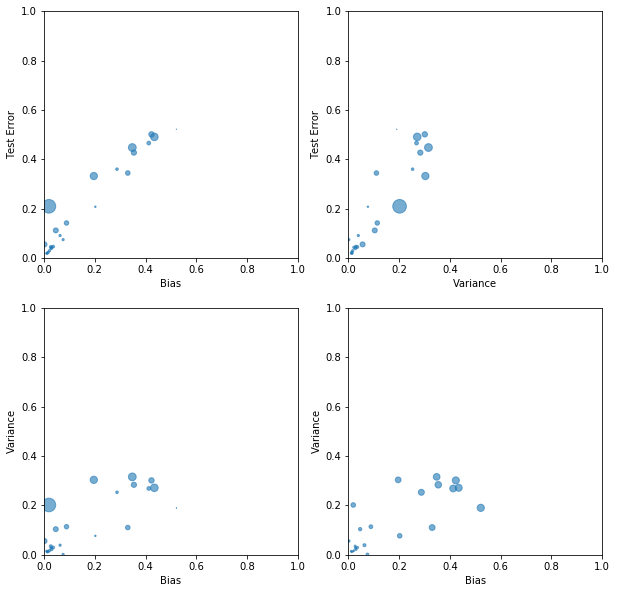

In [47]:
bias = np_inb_standard_o[:,0]
var = np_inb_standard_o[:,1]
train_err = np_inb_standard_o[:,2]
train_std = np_inb_standard_o[:,3]
test_err = np_inb_standard_o[:,4]
test_std = np_inb_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(inb_meta[:,4])/24
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,24):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.8.jpg")   
plt.show()

# Large set

In [28]:
np_large_standard_o = np_standard_o[large_index,:]
np_large_standard_o.shape

(26, 6)

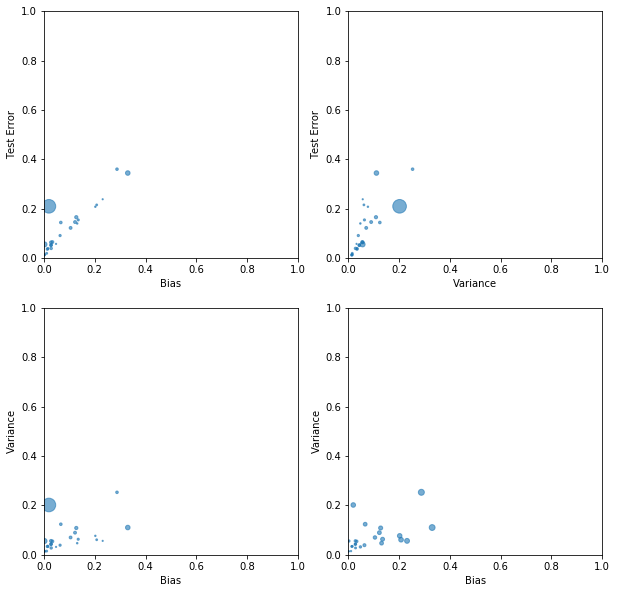

In [48]:
bias = np_large_standard_o[:,0]
var = np_large_standard_o[:,1]
train_err = np_large_standard_o[:,2]
train_std = np_large_standard_o[:,3]
test_err = np_large_standard_o[:,4]
test_std = np_large_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(large_meta[:,4])/26
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,26):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.10.jpg")
plt.show()

In [30]:
np.where(test_std == max(test_std))
large_index[8] #
meta[91,5]
#may Imbalance 


8.406173403035153

# Small set

In [31]:
np_small_standard_o = np_standard_o[small_index,:]
np_small_standard_o.shape

(95, 6)

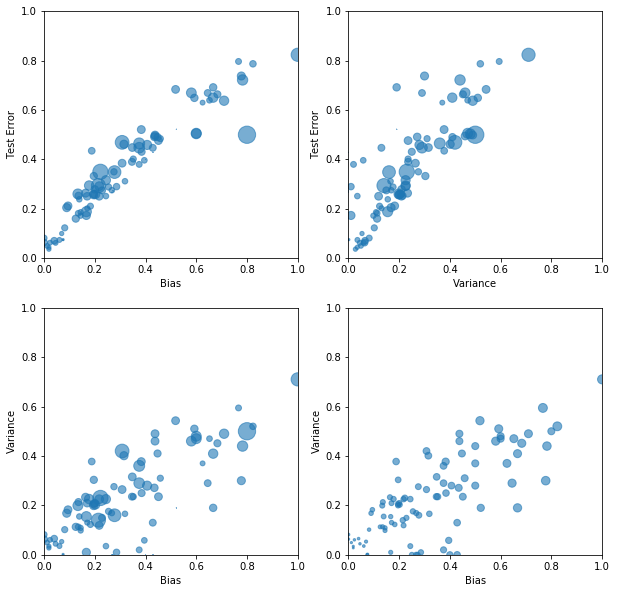

In [49]:
bias = np_small_standard_o[:,0]
var = np_small_standard_o[:,1]
train_err = np_small_standard_o[:,2]
train_std = np_small_standard_o[:,3]
test_err = np_small_standard_o[:,4]
test_std = np_small_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(small_meta[:,4])/95
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,95):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic2.2.9.jpg")
plt.show()